In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import os

In [2]:
sunpy_CWT = np.load('sunpy_CWT.npz')
points = sunpy_CWT['points']
CWT_sunpy = sunpy_CWT['CWT'] 

In [3]:
def CWT_creator(path_):
    data = np.load(path_)
    er = data['er']
    E_space, CWT_space = CWT_maker(-1, 10, er)
    return E_space, CWT_space

In [4]:
def compressor(array):
    comp_er = [0]
    for i in range(len(array)):
        if array[i]:
            comp_er[-1] += array[i]
        else:
            comp_er.append(0)
    return comp_er

In [5]:
def CWT(E, er):
    WT = []
    comp_er = compressor(er)
    indx = [i for i, v in enumerate(comp_er) if v> E]
    for i in range(1, len(indx)):
        WT.append(indx[i]-indx[i-1])
    return np.median(WT)

In [6]:
def CWT_maker(min_, max_, er):
    E_space = np.logspace(min_, max_, 100)
    CWT_space = []
    for item in E_space:
        CWT_space.append(CWT(item, er))
    CWT_space = np.array(CWT_space)
    return E_space, CWT_space

In [11]:
# E1, CWT1 = CWT_creator('../N48_D01_data.npz')
E2, CWT2 = CWT_creator('/home/hlamarre/PycharmProjects/AVFS/Code/Python/TestingFilesHenri/Analysis/F148SOC.npz.npz.npz')

/home/hlamarre/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hlamarre/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


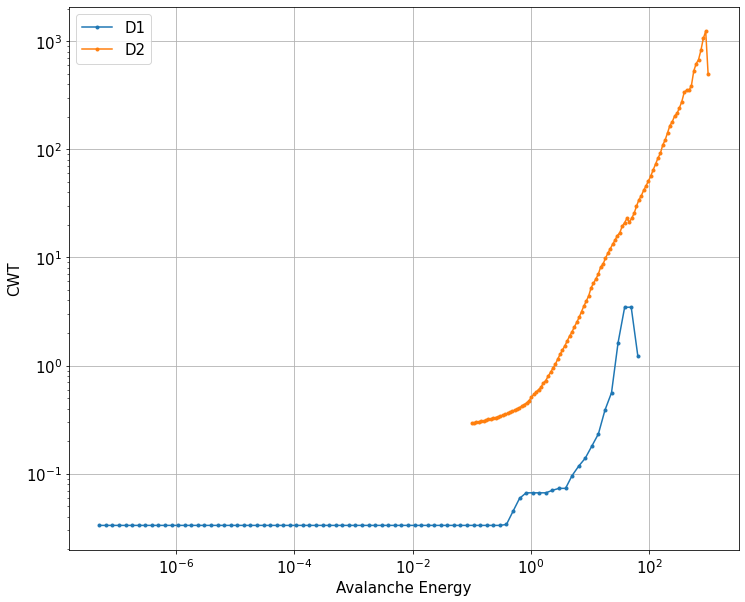

In [12]:
plt.figure()
# plt.loglog(E1/2e6, CWT1/3e3, marker = '.')
plt.loglog(E2/2e6, CWT2/3e3, marker = '.')
plt.loglog(points*1e6, CWT_sunpy/7e4, marker = '.')
plt.ylabel('CWT', fontsize = 15)
plt.xlabel('Avalanche Energy', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['D1' ,'D2' ,'Sun'], fontsize = 15)
plt.grid()